## Answer 2

We have 2D data sampled i.i.d from mixture of 3 gaussians. There are 1000 samples for training and 10000 for testing. 
- We train and test a single hidden layer MLP function approximator to estimate the value of x2 from the value of x1 by minimizing the mean-squared-error (MSE) on the training set.
- This is a "Regression" problem
- We use 10-fold cross-validation to select between logistic (sigmoid) and softplus (SmoothReLu) nonlinearities for the perceptrons in the hidden layer, as well as the number of perceptrons.
- Output layer is linear 
- The best model architecture is identified using cross- validation, and the selected model is trained with the entire training set.
- This MLP is applied to the test dataset
- Tensorflow and Keras have been used for the problem
- RMSprop is used as update rule for optimization. Mean squared error is the loss function and the accuracy metric

ToDo-
- Estimate the test performance
- (1) visual and numerical demonstrations of the cross-validation process indicating how the model selection was carried out; (2) visual and numerical demonstration of the performance of the trained model on the test data set.
- keras graph 

![title](./images/IMG_6589.jpg)
* Gradient Descent Update Rule is - 
![title](./images/1.png)
where L is MSE loss function

In [41]:
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.datasets import make_spd_matrix
from scipy.stats import multivariate_normal
from sklearn.model_selection import KFold
from mpl_toolkits.mplot3d import Axes3D
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import OneHotEncoder
from keras.callbacks import EarlyStopping

### Generate Data

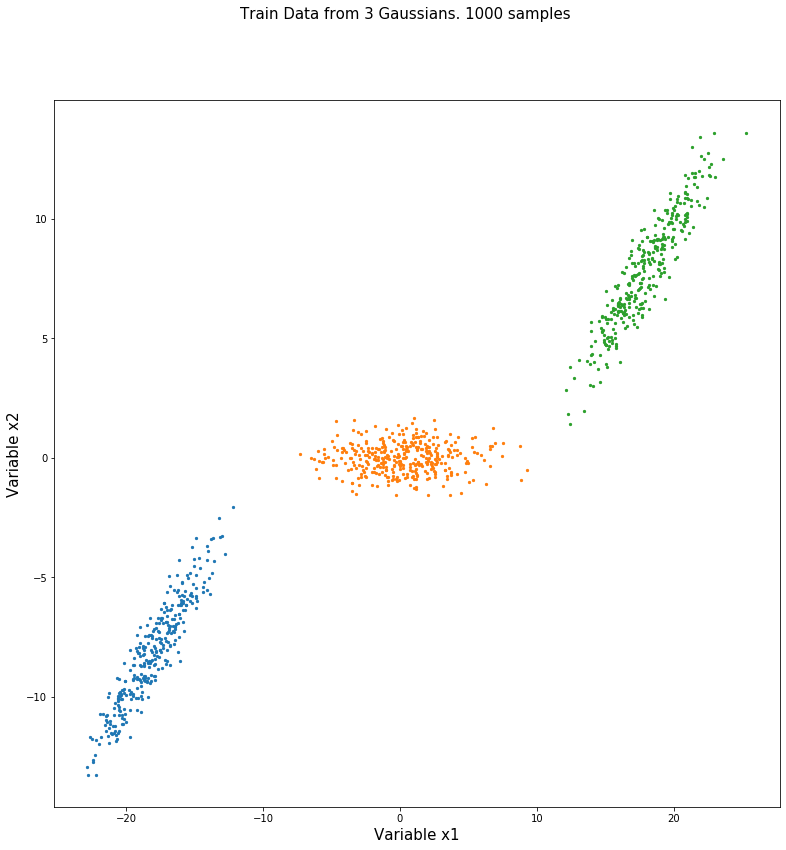

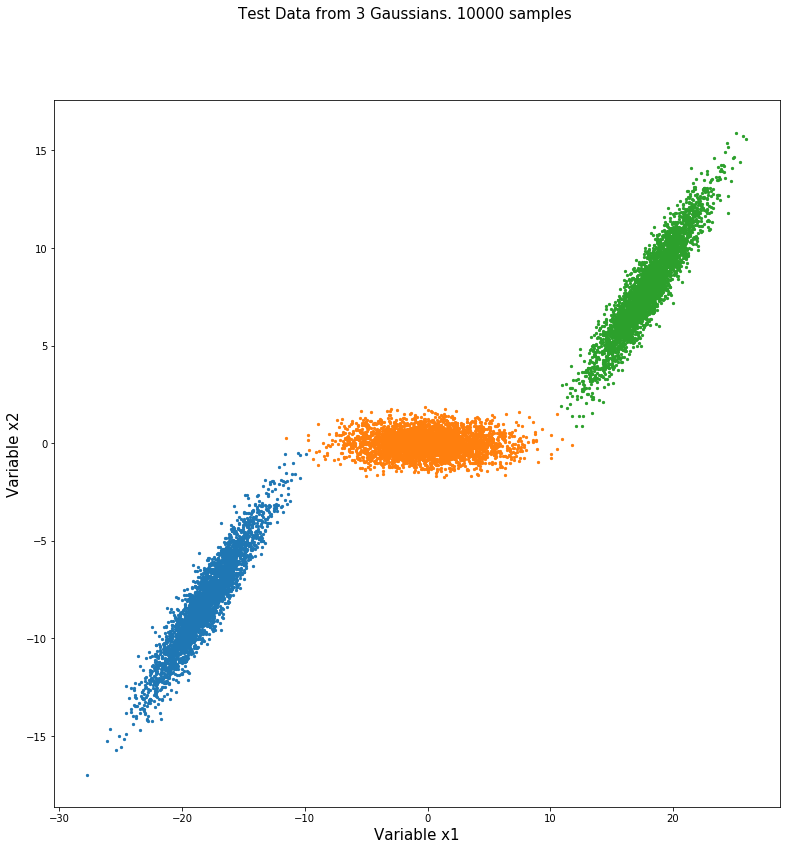

In [33]:
μ1 = [-18, -8]
μ2 = [0, 0]
μ3 = [18, 8]
eigenvalue_cov_mat = np.array([[3.2**2, 0], [0, 0.6**2]])
eigen_vector1 = np.array([[1, -1], [1, 1]])/math.sqrt(2)
eigen_vector2 = np.array([[1, 0], [0, 1]])
eigen_vector3 = np.array([[1, -1], [1, 1]])/math.sqrt(2)
priors=[0.33,0.34,0.33]
data_dist = np.random.uniform(0, 1, 1000)
gaussian1 = (np.matmul(np.matmul(eigen_vector1,(eigenvalue_cov_mat**0.5)),np.random.randn(2, len(data_dist[np.where(data_dist<=priors[0])]))) + np.array(μ1)[:, None]).T
gaussian2 = (np.matmul(np.matmul(eigen_vector2,(eigenvalue_cov_mat**0.5)),np.random.randn(2, len([x for x in data_dist if x<=(priors[0]+priors[1]) and x>priors[0]]))) + np.array(μ2)[:, None]).T
gaussian3 = (np.matmul(np.matmul(eigen_vector3,(eigenvalue_cov_mat**0.5)),np.random.randn(2, len(data_dist[np.where(data_dist>(priors[0]+priors[1]))]))) + np.array(μ3)[:, None]).T
train_dataset = np.vstack([gaussian1, gaussian2, gaussian3])
fig = plt.figure(figsize=(13,13));
plt.xlabel('Variable x1',size=15)
plt.ylabel('Variable x2',size=15)
fig.suptitle('Train Data from 3 Gaussians. 1000 samples', fontsize=15)
plt.scatter(gaussian1[:, 0], gaussian1[:, 1], label='Gaussian 1', s=5)
plt.scatter(gaussian2[:, 0], gaussian2[:, 1], label='Gaussian 2', s=5)
plt.scatter(gaussian3[:, 0], gaussian3[:, 1], label='Gaussian 3', s=5);
data_dist = np.random.uniform(0, 1, 10000)
test_gaussian1 = (np.matmul(np.matmul(eigen_vector1,(eigenvalue_cov_mat**0.5)),np.random.randn(2, len(data_dist[np.where(data_dist<=priors[0])]))) + np.array(μ1)[:, None]).T
test_gaussian2 = (np.matmul(np.matmul(eigen_vector2,(eigenvalue_cov_mat**0.5)),np.random.randn(2, len([x for x in data_dist if x<=(priors[0]+priors[1]) and x>priors[0]]))) + np.array(μ2)[:, None]).T
test_gaussian3 = (np.matmul(np.matmul(eigen_vector3,(eigenvalue_cov_mat**0.5)),np.random.randn(2, len(data_dist[np.where(data_dist>(priors[0]+priors[1]))]))) + np.array(μ3)[:, None]).T
test_dataset = np.vstack([test_gaussian1, test_gaussian2, test_gaussian3])
fig = plt.figure(figsize=(13,13));
plt.xlabel('Variable x1',size=15)
plt.ylabel('Variable x2',size=15)
fig.suptitle('Test Data from 3 Gaussians. 10000 samples', fontsize=15)
plt.scatter(test_gaussian1[:, 0], test_gaussian1[:, 1], label='Gaussian 1', s=5)
plt.scatter(test_gaussian2[:, 0], test_gaussian2[:, 1], label='Gaussian 2', s=5)
plt.scatter(test_gaussian3[:, 0], test_gaussian3[:, 1], label='Gaussian 3', s=5);

### Neural Network

In [67]:
X=train_dataset[:,0]
Y=train_dataset[:,1]
nodes_param=[6,8,10,12,14,16,18,20,22,24]
print("Input shape is ",X.shape)
print("Output shape is ",Y.shape)
def create_model(nodes,activation):
    model = Sequential()
    model.add(Dense(nodes, input_dim=1,activation=activation))
    model.add(Dense(1))
    model.compile(loss='mse', optimizer='RMSprop', metrics=['mse'])
    return model
model = keras.wrappers.scikit_learn.KerasRegressor(build_fn=create_model,nodes='nodes',activation='activation')
from sklearn.model_selection import GridSearchCV
parameters = {'nodes':nodes_param,'activation':['softplus','sigmoid']}
model_GridSearchCV = GridSearchCV(model, parameters, cv=10,scoring='neg_mean_squared_error')
es = EarlyStopping(monitor='mse', mode='min', verbose=1, patience=10,min_delta=.001)
grid_result=model_GridSearchCV.fit(X, Y, epochs=2000, batch_size=len(X), verbose=0,callbacks=[es]);

Input shape is  (1000,)
Output shape is  (1000,)
Epoch 01930: early stopping
Epoch 01717: early stopping
Epoch 01551: early stopping
Epoch 01606: early stopping
Epoch 01942: early stopping
Epoch 01749: early stopping
Epoch 01928: early stopping
Epoch 01478: early stopping
Epoch 01918: early stopping
Epoch 01685: early stopping
Epoch 01571: early stopping
Epoch 01765: early stopping
Epoch 01933: early stopping
Epoch 01503: early stopping
Epoch 01567: early stopping
Epoch 01493: early stopping
Epoch 01347: early stopping
Epoch 01610: early stopping
Epoch 01664: early stopping
Epoch 01996: early stopping
Epoch 01854: early stopping
Epoch 01552: early stopping
Epoch 01423: early stopping
Epoch 01671: early stopping
Epoch 01856: early stopping
Epoch 01709: early stopping
Epoch 01683: early stopping
Epoch 01499: early stopping
Epoch 01763: early stopping
Epoch 01709: early stopping
Epoch 01500: early stopping
Epoch 01676: early stopping
Epoch 01396: early stopping
Epoch 01678: early stopping

In [104]:
means = grid_result.cv_results_['mean_test_score']
params = grid_result.cv_results_['params']
for mean, param in zip(means, params):
    print("%f  with: %r" % (mean*-1, param))

0.871308  with: {'activation': 'softplus', 'nodes': 6}
0.820844  with: {'activation': 'softplus', 'nodes': 8}
0.822370  with: {'activation': 'softplus', 'nodes': 10}
0.814354  with: {'activation': 'softplus', 'nodes': 12}
0.819465  with: {'activation': 'softplus', 'nodes': 14}
0.778785  with: {'activation': 'softplus', 'nodes': 16}
0.792887  with: {'activation': 'softplus', 'nodes': 18}
0.777911  with: {'activation': 'softplus', 'nodes': 20}
0.801630  with: {'activation': 'softplus', 'nodes': 22}
0.784004  with: {'activation': 'softplus', 'nodes': 24}
8.579601  with: {'activation': 'sigmoid', 'nodes': 6}
6.007163  with: {'activation': 'sigmoid', 'nodes': 8}
3.052644  with: {'activation': 'sigmoid', 'nodes': 10}
3.056905  with: {'activation': 'sigmoid', 'nodes': 12}
2.046629  with: {'activation': 'sigmoid', 'nodes': 14}
2.519269  with: {'activation': 'sigmoid', 'nodes': 16}
2.033208  with: {'activation': 'sigmoid', 'nodes': 18}
2.020208  with: {'activation': 'sigmoid', 'nodes': 20}
1.95

In [105]:
print("Best: %f using parameters %s" % (grid_result.best_score_*-1, grid_result.best_params_))

Best: 0.777911 using parameters {'activation': 'softplus', 'nodes': 20}


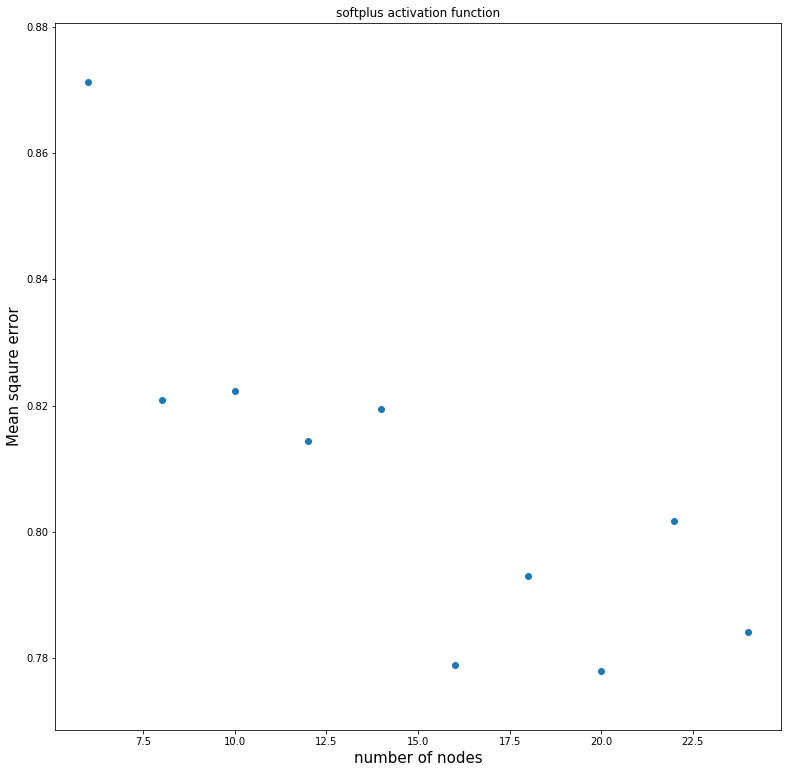

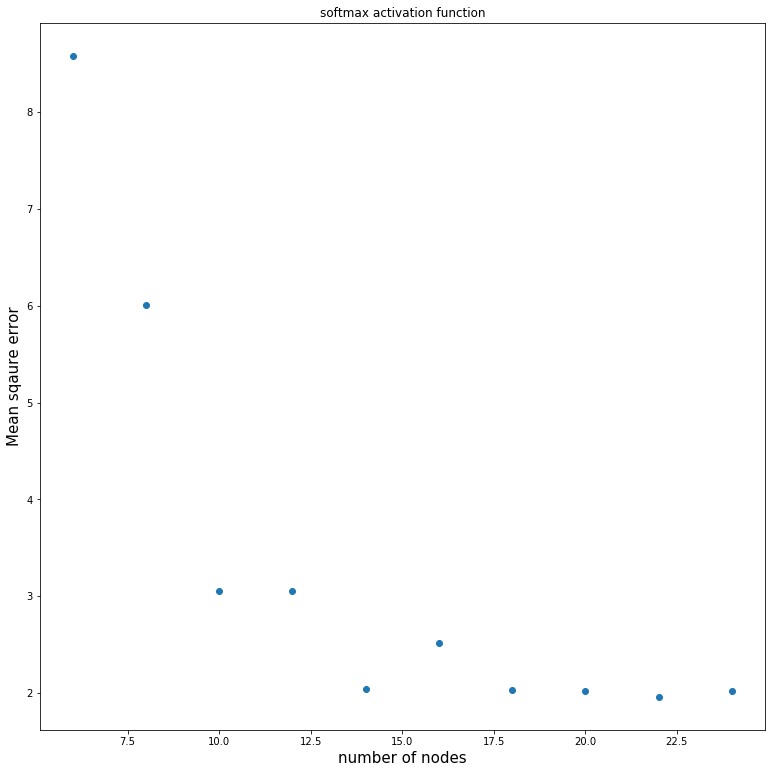

In [106]:
%matplotlib inline
softplus=[]
sigmoid=[]
for mean, param in zip(means, params):
    if (param['activation']=='softplus'):
        softplus.append(mean*-1)
    else:
        sigmoid.append(mean*-1)
fig = plt.figure(figsize=(13,13));
plt.title('softplus activation function')
plt.xlabel('number of nodes',size=15)
plt.ylabel('Mean sqaure error',size=15)
plt.scatter(nodes_param,softplus)
plt.show()
fig = plt.figure(figsize=(13,13));
plt.title('softmax activation function')
plt.xlabel('number of nodes',size=15)
plt.ylabel('Mean sqaure error',size=15)
plt.scatter(nodes_param,sigmoid)

plt.show()


In [107]:
best_nodes=grid_result.best_params_['nodes']
best_activation=grid_result.best_params_['activation']

### Train the best parameters on entire dataset and see its accuracy on the test dataset

In [145]:
mlp_model = Sequential()
mlp_model.add(Dense(best_nodes, input_dim=1, activation=best_activation))
mlp_model.add(Dense(1))
mlp_model.compile(loss='mse', optimizer='RMSprop', metrics=['mse'])
mlp_model.fit(train_dataset[:, 0], train_dataset[:, 1], epochs=10000, verbose=0, batch_size=1000,callbacks=[es]);
mlp_model.summary()

Epoch 01871: early stopping
Model: "sequential_1158"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2316 (Dense)           (None, 20)                40        
_________________________________________________________________
dense_2317 (Dense)           (None, 1)                 21        
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


Mean squared error in the test set is  0.7279719124794006







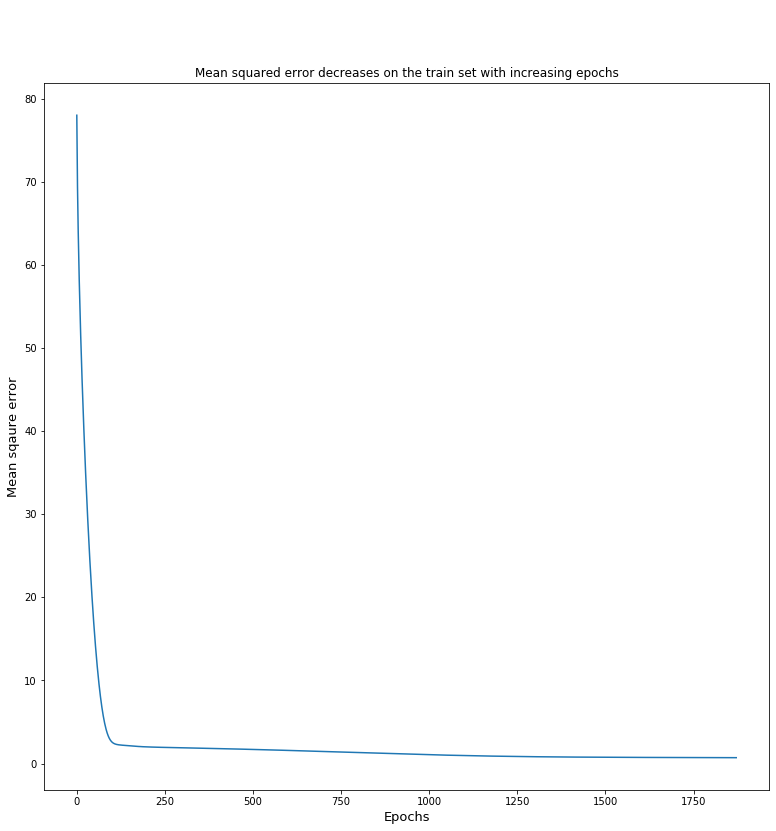

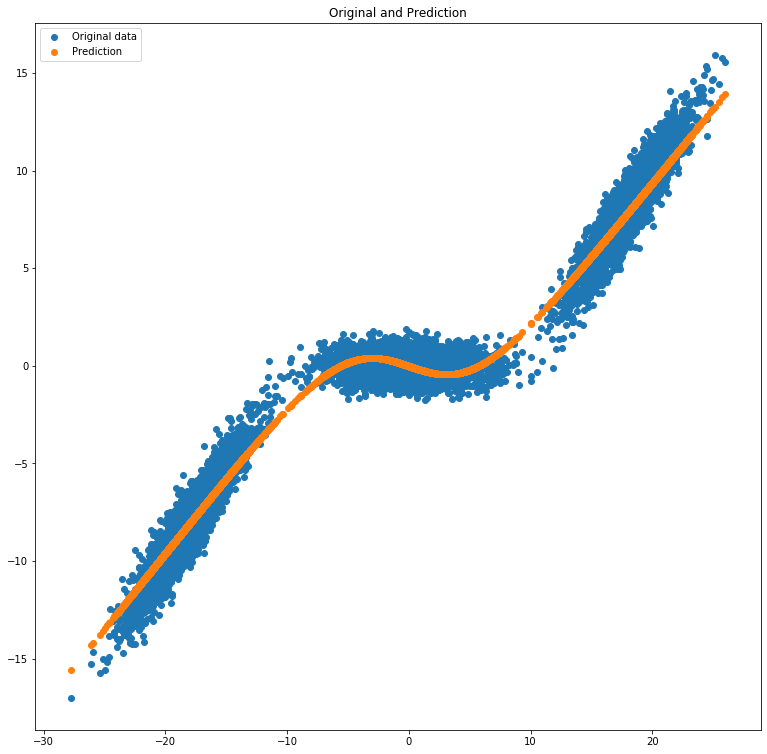

In [146]:
fig = plt.figure(figsize=(13,13));
plt.plot(np.linspace(0,1871,1871),mlp_model.history.history['loss']);

plt.title('\n\n\n\nMean squared error decreases on the train set with increasing epochs')
plt.xlabel('Epochs',size=13)
plt.ylabel('Mean sqaure error',size=13)
scores = mlp_model.evaluate(test_dataset[:, 0], test_dataset[:, 1],verbose=0);
print ("Mean squared error in the test set is ",scores[0])
print ("\n\n\n\n")
fig = plt.figure(figsize=(13,13));
test_pred = mlp_model.predict(test_dataset[:, 0])
plt.scatter(test_dataset[:, 0], test_dataset[:, 1], label = 'Original data')
plt.scatter(test_dataset[:, 0], test_pred, label = 'Prediction')
plt.legend()
plt.title('Original and Prediction');